In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\KerenYlab\Desktop\vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df_grouped = df.groupby('Platform').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']]
# df_grouped

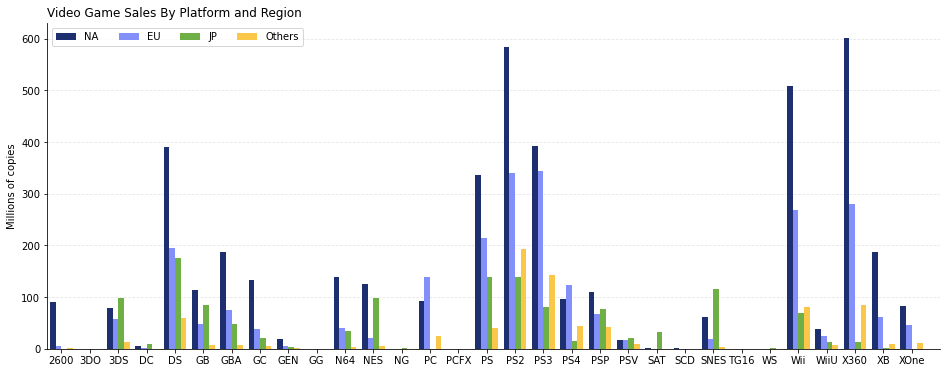

In [7]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))
# numerical x
x = np.arange(0, len(df_grouped.index))
# plot bars
plt.bar(x - 0.3, df_grouped['NA_Sales'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_grouped['EU_Sales'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, df_grouped['JP_Sales'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_grouped['Other_Sales'], width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Millions of copies')
plt.xticks(x, df_grouped.index)
plt.xlim(-0.5, 31)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Video Game Sales By Platform and Region', loc ='left')
plt.legend(['NA', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

In [10]:
## sort values
df_grouped = df_grouped.sort_values('Global_Sales')
df_grouped.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PCFX,0.0,0.0,0.03,0.0,0.03
GG,0.0,0.0,0.04,0.0,0.04
3DO,0.0,0.0,0.10,0.0,0.10
TG16,0.0,0.0,0.16,0.0,0.16
WS,0.0,0.0,1.42,0.0,1.42


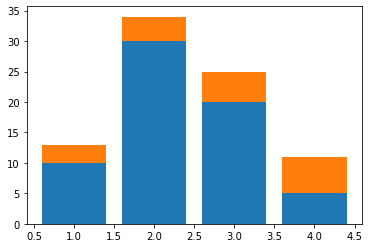

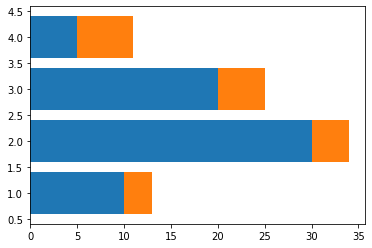

In [11]:
plt.bar([1,2,3,4], [10,30,20,5])
plt.bar([1,2,3,4], [3,4,5,6], bottom = [10,30,20,5])
plt.show()
plt.barh([1,2,3,4], [10,30,20,5])
plt.barh([1,2,3,4], [3,4,5,6], left = [10,30,20,5])
plt.show()

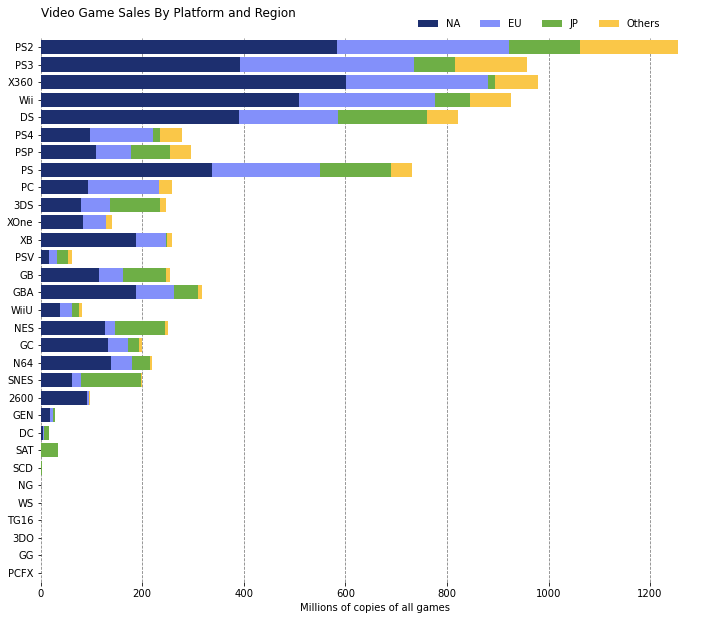

In [14]:
fields = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]
# title, legend, labels
plt.title('Video Game Sales By Platform and Region\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Millions of copies of all games')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

In [13]:
## sort values
df_grouped = df_grouped.sort_values('Other_Sales')
fields = ['Other_Sales', 'NA_Sales','EU_Sales','JP_Sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Others', 'NA', 'EU', 'JP']

In [18]:
fields = ['Other_Sales', 'NA_Sales','EU_Sales','JP_Sales']
df_grouped = df.groupby('Platform').sum()
# in some cases global sales is not equal to the sum of all regions
# so I'll re calculate it
df_grouped['Global_Sales'] = df_grouped[fields].sum(axis=1)
# create a column for each regions proportion of global sales
for i in fields:
    df_grouped['{}_Percent'.format(i)] = df_grouped[i] / df_grouped['Global_Sales']
df_grouped.sort_values('NA_Sales_Percent', inplace=True)
df_grouped.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Other_Sales_Percent,NA_Sales_Percent,EU_Sales_Percent,JP_Sales_Percent
Platform,,,,,,,,,,,
GG,13527,1992.0,0.0,0.0,0.04,0.0,0.04,0.0,0.0,0.0,1.0
3DO,43118,5984.0,0.0,0.0,0.10,0.0,0.10,0.0,0.0,0.0,1.0
PCFX,14559,1996.0,0.0,0.0,0.03,0.0,0.03,0.0,0.0,0.0,1.0
WS,47273,12000.0,0.0,0.0,1.42,0.0,1.42,0.0,0.0,0.0,1.0
TG16,24763,3990.0,0.0,0.0,0.16,0.0,0.16,0.0,0.0,0.0,1.0


In [34]:
# variables
labels = ['NA', 'EU', 'JP', 'Others']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
title = 'Video Game Sales By Platform and Region\n'
subtitle = 'Proportion of Games Sold by Region'
def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
    # plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]
    # title and subtitle
        plt.title(title, loc='left')
        plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
    # legend
        plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)
    # remove spines
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    # format x ticks
        xticks = np.arange(0,1.1,0.1)
        xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
        plt.xticks(xticks, xlabels)
    # adjust limits and draw grid lines
        plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
        ax.xaxis.grid(color='gray', linestyle='dashed')
    plt.show()

df_filtered = df_grouped[['Other_Sales_Percent', 'NA_Sales_Percent', 'EU_Sales_Percent', 'JP_Sales_Percent']]
df_filtered = df_filtered.sort_values('Other_Sales_Percent')

# plot_stackedbar_p(df_filtered, labels, colors, title, subtitle)
df_filtered

,Other_Sales_Percent,NA_Sales_Percent,EU_Sales_Percent,JP_Sales_Percent
Platform,,,,
GG,0.000000,0.000000,0.000000,1.000000
3DO,0.000000,0.000000,0.000000,1.000000
PCFX,0.000000,0.000000,0.000000,1.000000
WS,0.000000,0.000000,0.000000,1.000000
TG16,0.000000,0.000000,0.000000,1.000000
NG,0.000000,0.000000,0.000000,1.000000
SAT,0.002084,0.021435,0.016076,0.960405
2600,0.009383,0.934213,0.056403,0.000000
SNES,0.016097,0.306089,0.095181,0.582633
